## *Course Name: Data Mining and Analysis*

* Course Code: 18ECSC301
* Project code: 5DMACP06
* Team No.: 10

## Title: *COVID-19 fake news detection*

## *Team Members:*
* Mohammed Ansar             01FE18BCS112
* Mohammed zakee             01FE18BCS113
* Khader Afghan              01FE19BCS417
* Maruti Arer                01FE18BCS111



### **Import Libraries**
* Imporing all the libraries which are required for the ML techniques

In [1]:
import pandas as pd
import nltk
import re
import csv
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from joblib import dump, load
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
import numpy as np
import itertools
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import nltk
import re


### **Exploring Dataset**
* Ploting the graph for the given datasets 
* Plotting the graph to determine % of fake and real news

Populating the interactive namespace from numpy and matplotlib


F:\Python\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['load']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


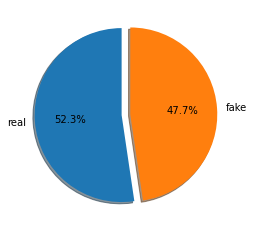

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6420 non-null   int64 
 1   tweet   6420 non-null   object
 2   label   6420 non-null   object
dtypes: int64(1), object(2)
memory usage: 150.6+ KB


,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [2]:
%pylab inline
train = pd.read_csv('train.csv')
val= pd.read_csv('validation.csv')
test=pd.read_csv('test.csv')

df=train['label'].value_counts()
key=df.keys()
labels=key
s=[]
for i in key:
    s.append(df[i])
explode=(0,0.1)
plt.pie(s,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()
train.info()
train.head()

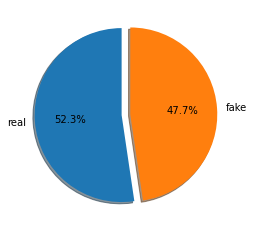

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2140 non-null   int64 
 1   tweet   2140 non-null   object
 2   label   2140 non-null   object
dtypes: int64(1), object(2)
memory usage: 50.3+ KB


,id,tweet,label
0,1,Chinese converting to Islam after realising th...,fake
1,2,11 out of 13 people (from the Diamond Princess...,fake
2,3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",fake
3,4,Mike Pence in RNC speech praises Donald Trump’...,fake
4,5,6/10 Sky's @EdConwaySky explains the latest #C...,real


In [3]:
df=val['label'].value_counts()
key=df.keys()
labels=key
s=[]
for i in key:
    s.append(df[i])
explode=(0,0.1)
plt.pie(s,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()
val.info()
val.head()

## Data-Preprocessing

* Removing of links.
* Removing of special characters like  â–¶ï, ðŸ, â€™@?
* Removing hash tags.
* Tokenization of words.
* Removal of stopwords.
* Lemmatization of words.
* Using countvectorizer.
* Using TFidF transformer for assigning frequency score of words.

In [4]:
stops = set(stopwords.words("english"))
ll = WordNetLemmatizer()
def cleantext(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"#(\S)+",' ',text) 
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)  
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    text = [w for w in text if not w in stops]
    #text = [ll.lemmatize(word) for word in text if not word in stopwords.words('english')]
    text = " ".join(text)
    return text
cv = CountVectorizer(max_features=100000,ngram_range=(1, 2))

In [5]:
train['tweet'] = train['tweet'].map(lambda x: cleantext(x))
val['tweet'] = val['tweet'].map(lambda x: cleantext(x))
test['tweet'] = test['tweet'].map(lambda x: cleantext(x))


## Model Building

* LINEAR SVC

In [6]:
pipeline = Pipeline([
        ('bow',cv),  
        ('tfidf', TfidfTransformer()),  
        ('c', LinearSVC())
    ])
fit1 = pipeline.fit(train['tweet'],train['label'])
predsvc=pipeline.predict(val['tweet'])

* LOGISTIC REGRESSION

In [7]:
pipeline = Pipeline([
        ('bow', cv),  
        ('tfidf', TfidfTransformer()),  
        ('c', LogisticRegression())
    ])
fit = pipeline.fit(train['tweet'],train['label'])
predlr=pipeline.predict(val['tweet'])

* PASSIVE AGGRESSIVE CLASSIFIER

In [8]:
pipeline = Pipeline([
        ('bow', cv),  
        ('tfidf', TfidfTransformer()),  
        ('c', PassiveAggressiveClassifier(max_iter=50))
    ])
fit = pipeline.fit(train['tweet'],train['label'])
predpa=pipeline.predict(val['tweet'])

* MULTINOMIAL NAIVE BAYES CLASSIFIER

In [9]:
pipeline = Pipeline([
        ('bow', cv),  
        ('tfidf', TfidfTransformer()),  
        ('c', MultinomialNB())
    ])
fit = pipeline.fit(train['tweet'],train['label'])
predmnb=pipeline.predict(val['tweet'])

* GRADIENT BOOST CLASSIFIER

In [10]:
pipeline = Pipeline([
        ('bow',cv),  
        ('tfidf', TfidfTransformer()),  
        ('c', GradientBoostingClassifier())
    ])
fit = pipeline.fit(train['tweet'],train['label'])
predgb=pipeline.predict(val['tweet'])

* XG BOOST CLASSIFIER

In [11]:
pipeline = Pipeline([
        ('bow',cv),  
        ('tfidf', TfidfTransformer()),  
        ('c', XGBClassifier())
    ])
fit = pipeline.fit(train['tweet'],train['label'])
predxg=pipeline.predict(val['tweet'])


* DECISION TREE CLASSIFIER

In [12]:
pipeline = Pipeline([
        ('bow', cv),  
        ('tfidf', TfidfTransformer()),  
        ('c', tree.DecisionTreeClassifier())
    ])
fit = pipeline.fit(train['tweet'],train['label'])
preddt = pipeline.predict(val['tweet'])

* ADA BOOST CLASSIFIER

In [13]:
abc = AdaBoostClassifier(n_estimators=500,
                         learning_rate=1)
pipeline = Pipeline([
        ('bow', cv),  
        ('tfidf', TfidfTransformer()),  
        ('d', abc)
    ])
fit = pipeline.fit(train['tweet'],train['label'])
predab = pipeline.predict(val['tweet'])

## BIAS-VARIANCE TRADEOFF AND CONFUSION MATRIX

* Function for ploting confusion matrix

In [14]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

* Function to print performance metrices

In [15]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))    

* LINEAR SVC 

[[ 962   58]
 [  66 1054]]
              precision    recall  f1-score   support

        fake       0.94      0.94      0.94      1020
        real       0.95      0.94      0.94      1120

    accuracy                           0.94      2140
   macro avg       0.94      0.94      0.94      2140
weighted avg       0.94      0.94      0.94      2140

Accuracy :  0.9420560747663551
Precison :  0.9420637974816094
Recall :  0.9420560747663551
F1 :  0.9420467451973


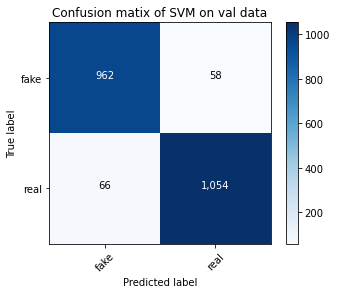

0.8271028037383178
0.8644859813084113
0.8901869158878505
0.8878504672897196
0.9135514018691588


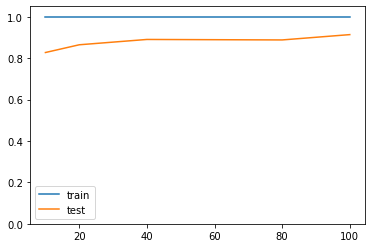

In [18]:
print_metrices(predsvc,val['label'])
plot_confusion_matrix(confusion_matrix(val['label'],predsvc),target_names=['fake','real'], normalize = False, title = 'Confusion matix of SVM on val data')
X=val['tweet']
y=val['label']
pi = Pipeline([
        ('bow', cv),  
        ('tfidf', TfidfTransformer()),  
        ('c', LinearSVC())
    ])
train_sizes, train_scores, valid_scores = learning_curve(pi, X, y, train_sizes=[214,428,642,856,1712], cv=5)
k=[10,20,40,80,100]
j=[0,1,2,3,4]
t_s=[]
v_s=[]
for i in j:
    t_s.append(train_scores[i][0])
    v_s.append(valid_scores[i][0])
    print(valid_scores[i][0])
plt.plot(k, t_s, label = "train")
plt.plot(k, v_s, label = "test")
plt.ylim(0,1.05)
plt.legend() 
plt.show()

* LOGISTIC REGRESSION

[[ 942   78]
 [  89 1031]]
              precision    recall  f1-score   support

        fake       0.91      0.92      0.92      1020
        real       0.93      0.92      0.93      1120

    accuracy                           0.92      2140
   macro avg       0.92      0.92      0.92      2140
weighted avg       0.92      0.92      0.92      2140

Accuracy :  0.9219626168224299
Precison :  0.9219780049870415
Recall :  0.9219626168224299
F1 :  0.9219459055445536


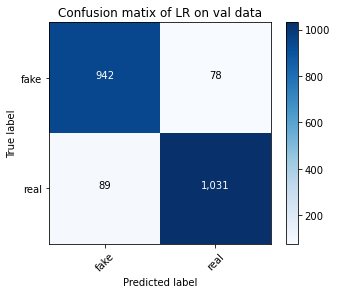

0.7546728971962616
0.852803738317757
0.8691588785046729
0.8761682242990654
0.897196261682243


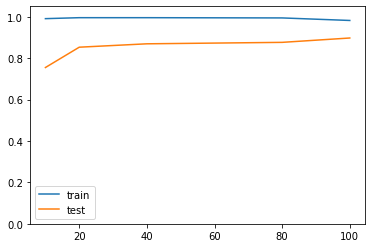

In [19]:
print_metrices(predlr,val['label'])
plot_confusion_matrix(confusion_matrix(val['label'],predlr),target_names=['fake','real'], normalize = False, title = 'Confusion matix of LR on val data')
X=val['tweet']
y=val['label']
pi = Pipeline([
        ('bow', cv),  
        ('tfidf', TfidfTransformer()),  
        ('c', LogisticRegression())
    ])
train_sizes, train_scores, valid_scores = learning_curve(pi, X, y, train_sizes=[214,428,642,856,1712], cv=5)
k=[10,20,40,80,100]
j=[0,1,2,3,4]
t_s=[]
v_s=[]
for i in j:
    t_s.append(train_scores[i][0])
    v_s.append(valid_scores[i][0])
    print(valid_scores[i][0])

plt.plot(k, t_s, label = "train")
plt.plot(k, v_s, label = "test")
plt.ylim(0,1.05)
plt.legend() 
plt.show()

* PASSIVE AGGRESSIVE CLASSIFIER

[[ 953   67]
 [  64 1056]]
              precision    recall  f1-score   support

        fake       0.94      0.93      0.94      1020
        real       0.94      0.94      0.94      1120

    accuracy                           0.94      2140
   macro avg       0.94      0.94      0.94      2140
weighted avg       0.94      0.94      0.94      2140

Accuracy :  0.938785046728972
Precison :  0.9387970234822901
Recall :  0.938785046728972
F1 :  0.9387891866847217


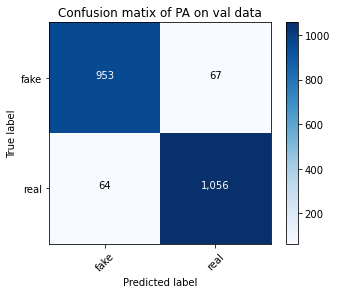

0.8341121495327103
0.8644859813084113
0.8925233644859814
0.8901869158878505
0.9182242990654206


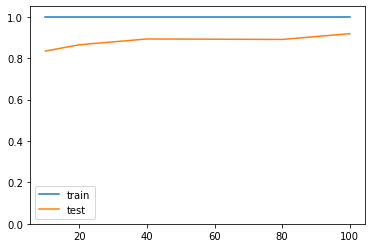

In [20]:
print_metrices(predpa,val['label'])
plot_confusion_matrix(confusion_matrix(val['label'],predpa),target_names=['fake','real'], normalize = False, title = 'Confusion matix of PA on val data')
X=val['tweet']
y=val['label']
pi = Pipeline([
        ('bow', cv),  
        ('tfidf', TfidfTransformer()),  
        ('c',  PassiveAggressiveClassifier(max_iter=50))
    ])
train_sizes, train_scores, valid_scores = learning_curve(pi, X, y, train_sizes=[214,428,642,856,1712], cv=5)
k=[10,20,40,80,100]
j=[0,1,2,3,4]
t_s=[]
v_s=[]
for i in j:
    t_s.append(train_scores[i][0])
    v_s.append(valid_scores[i][0])
    print(valid_scores[i][0])

plt.plot(k, t_s, label = "train")
plt.plot(k, v_s, label = "test")
plt.ylim(0,1.05)
plt.legend() 
plt.show()

* MULTINOMIAL NAIVE BAYES CLASSIFIER

[[ 879  141]
 [  41 1079]]
              precision    recall  f1-score   support

        fake       0.96      0.86      0.91      1020
        real       0.88      0.96      0.92      1120

    accuracy                           0.91      2140
   macro avg       0.92      0.91      0.91      2140
weighted avg       0.92      0.91      0.91      2140

Accuracy :  0.9149532710280374
Precison :  0.9197022500589022
Recall :  0.9149532710280374
F1 :  0.9153279592339233


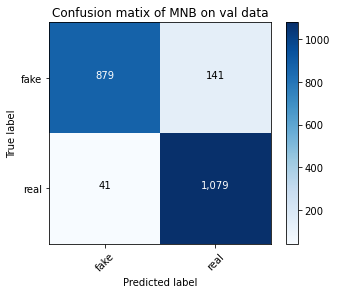

0.7523364485981309
0.8364485981308412
0.8598130841121495
0.8434579439252337
0.897196261682243


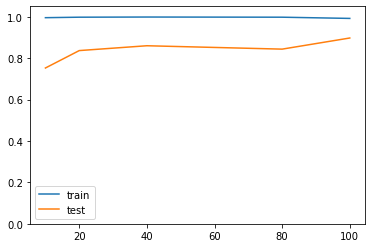

In [21]:
print_metrices(predmnb,val['label'])
plot_confusion_matrix(confusion_matrix(val['label'],predmnb),target_names=['fake','real'], normalize = False, title = 'Confusion matix of MNB on val data')
X=val['tweet']
y=val['label']
pi = Pipeline([
        ('bow', cv),  
        ('tfidf', TfidfTransformer()),  
        ('c',  MultinomialNB())
    ])
train_sizes, train_scores, valid_scores = learning_curve(pi, X, y, train_sizes=[214,428,642,856,1712], cv=5)
k=[10,20,40,80,100]
j=[0,1,2,3,4]
t_s=[]
v_s=[]
for i in j:
    t_s.append(train_scores[i][0])
    v_s.append(valid_scores[i][0])
    print(valid_scores[i][0])

plt.plot(k, t_s, label = "train")
plt.plot(k, v_s, label = "test")
plt.ylim(0,1.05)
plt.legend() 
plt.show() 

* GRADIENT BOOST CLASSIFIER

[[911 109]
 [169 951]]
              precision    recall  f1-score   support

        fake       0.84      0.89      0.87      1020
        real       0.90      0.85      0.87      1120

    accuracy                           0.87      2140
   macro avg       0.87      0.87      0.87      2140
weighted avg       0.87      0.87      0.87      2140

Accuracy :  0.8700934579439252
Precison :  0.8713279470666772
Recall :  0.8700934579439252
F1 :  0.8700253549074607


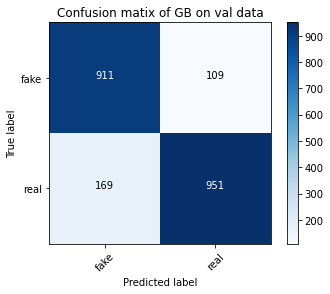

0.764018691588785
0.8130841121495327
0.8411214953271028
0.8504672897196262
0.8551401869158879


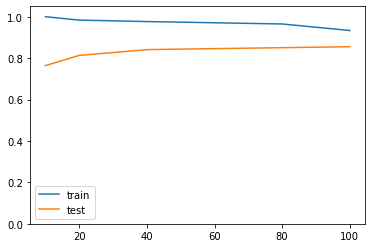

In [22]:
print_metrices(predgb,val['label'])
plot_confusion_matrix(confusion_matrix(val['label'],predgb),target_names=['fake','real'], normalize = False, title = 'Confusion matix of GB on val data')
X=val['tweet']
y=val['label']
pi = Pipeline([
        ('bow', cv),  
        ('tfidf', TfidfTransformer()),  
        ('c',  GradientBoostingClassifier())
    ])
train_sizes, train_scores, valid_scores = learning_curve(pi, X, y, train_sizes=[214,428,642,856,1712], cv=5)
k=[10,20,40,80,100]
j=[0,1,2,3,4]
t_s=[]
v_s=[]
for i in j:
    t_s.append(train_scores[i][0])
    v_s.append(valid_scores[i][0])
    print(valid_scores[i][0])

plt.plot(k, t_s, label = "train")
plt.plot(k, v_s, label = "test")
plt.ylim(0,1.05)
plt.legend() 
plt.show() 

* XG BOOST CLASSIFIER

[[936  84]
 [141 979]]
              precision    recall  f1-score   support

        fake       0.87      0.92      0.89      1020
        real       0.92      0.87      0.90      1120

    accuracy                           0.89      2140
   macro avg       0.90      0.90      0.89      2140
weighted avg       0.90      0.89      0.89      2140

Accuracy :  0.8948598130841121
Precison :  0.8960195211262074
Recall :  0.8948598130841121
F1 :  0.8948035193717345


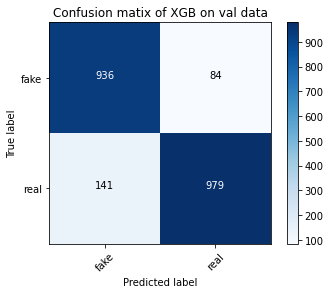

0.7523364485981309
0.7827102803738317
0.8317757009345794
0.8387850467289719
0.852803738317757


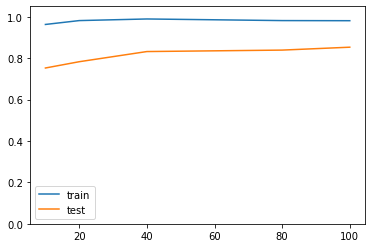

In [23]:
print_metrices(predxg,val['label'])
plot_confusion_matrix(confusion_matrix(val['label'],predxg),target_names=['fake','real'], normalize = False, title = 'Confusion matix of XGB on val data')
X=val['tweet']
y=val['label']
pi = Pipeline([
        ('bow', cv),  
        ('tfidf', TfidfTransformer()),  
        ('c',  XGBClassifier())
    ])
train_sizes, train_scores, valid_scores = learning_curve(pi, X, y, train_sizes=[214,428,642,856,1712], cv=5)
k=[10,20,40,80,100]
j=[0,1,2,3,4]
t_s=[]
v_s=[]
for i in j:
    t_s.append(train_scores[i][0])
    v_s.append(valid_scores[i][0])
    print(valid_scores[i][0])

plt.plot(k, t_s, label = "train")
plt.plot(k, v_s, label = "test")
plt.ylim(0,1.05)
plt.legend() 
plt.show() 

* DECISION TREE CLASSIFIER

[[861 159]
 [164 956]]
              precision    recall  f1-score   support

        fake       0.84      0.84      0.84      1020
        real       0.86      0.85      0.86      1120

    accuracy                           0.85      2140
   macro avg       0.85      0.85      0.85      2140
weighted avg       0.85      0.85      0.85      2140

Accuracy :  0.8490654205607476
Precison :  0.8490433322861854
Recall :  0.8490654205607476
F1 :  0.8490497345857372


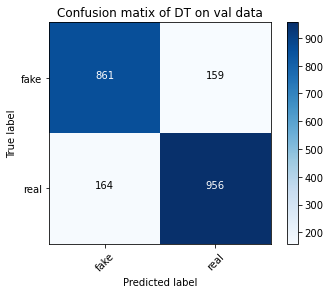

0.7149532710280374
0.7313084112149533
0.7710280373831776
0.8084112149532711
0.8200934579439252


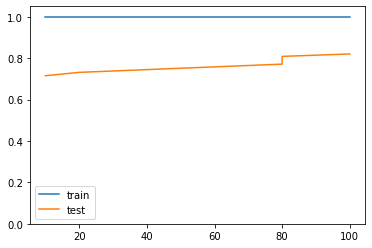

In [24]:
print_metrices(preddt,val['label'])
plot_confusion_matrix(confusion_matrix(val['label'],preddt),target_names=['fake','real'], normalize = False, title = 'Confusion matix of DT on val data')
X=val['tweet']
y=val['label']
pi = Pipeline([
        ('bow', cv),  
        ('tfidf', TfidfTransformer()),  
        ('c', tree.DecisionTreeClassifier())
    ])
train_sizes, train_scores, valid_scores = learning_curve(pi, X, y, train_sizes=[214,428,642,856,1712], cv=5)
k=[10,20,80,80,100]
j=[0,1,2,3,4]
t_s=[]
v_s=[]
for i in j:
    t_s.append(train_scores[i][0])
    v_s.append(valid_scores[i][0])
    print(valid_scores[i][0])

plt.plot(k, t_s, label = "train")
plt.plot(k, v_s, label = "test")
plt.ylim(0,1.05)
plt.legend() 
plt.show() 

* ADA BOOST CLASSIFIER

[[910 110]
 [121 999]]
              precision    recall  f1-score   support

        fake       0.88      0.89      0.89      1020
        real       0.90      0.89      0.90      1120

    accuracy                           0.89      2140
   macro avg       0.89      0.89      0.89      2140
weighted avg       0.89      0.89      0.89      2140

Accuracy :  0.8920560747663552
Precison :  0.8920570646482893
Recall :  0.8920560747663552
F1 :  0.8920329591664183


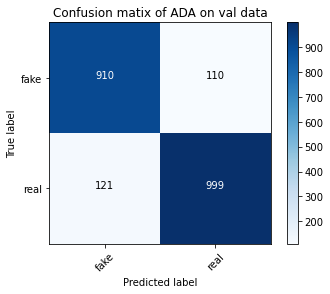

0.7710280373831776
0.8060747663551402
0.822429906542056
0.8107476635514018
0.866822429906542


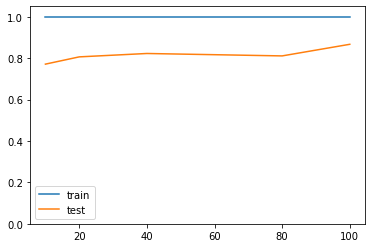

In [25]:
print_metrices(predab,val['label'])
plot_confusion_matrix(confusion_matrix(val['label'],predab),target_names=['fake','real'], normalize = False, title = 'Confusion matix of ADA on val data')
X=val['tweet']
y=val['label']
pi = Pipeline([
        ('bow', cv),  
        ('tfidf', TfidfTransformer()),  
        ('c', AdaBoostClassifier(n_estimators=500,
                         learning_rate=1))
    ])
train_sizes, train_scores, valid_scores = learning_curve(pi, X, y, train_sizes=[214,428,642,856,1712], cv=5)
k=[10,20,40,80,100]
j=[0,1,2,3,4]
t_s=[]
v_s=[]
for i in j:
    t_s.append(train_scores[i][0])
    v_s.append(valid_scores[i][0])
    print(valid_scores[i][0])

plt.plot(k, t_s, label = "train")
plt.plot(k, v_s, label = "test")
plt.ylim(0,1.05)
plt.legend() 
plt.show() 

## LONG-SHORT TERM MEMORY

* Importing Libraries

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
import tensorflow as tf
nltk.download('stopwords')
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


* READING CSV FILE

In [25]:
df=pd.read_csv('train - Copy.csv')
df.head()

* Drop Nan Values

In [27]:
df=df.dropna()

* Get the Independent Features

In [28]:
X=df.drop('label',axis=1)

* Get the Dependent features

In [29]:
y=df['label']

* Vocabulary size

In [33]:
voc_size=5000

* Creating copy of dataframe

In [34]:
messages=X.copy()
messages.reset_index(inplace=True)


* Dataset Preprocessing

In [37]:
corpus = []
for i in range(0, len(messages['tweet'])):
    review=cleantext(messages['tweet'][i])
    corpus.append(review)
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

In [40]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[2003 2543  965 ... 2824 4259 1163]
 [   0    0    0 ...  621 1661 3409]
 [   0    0    0 ... 4326 4520 2612]
 ...
 [   0    0    0 ... 2783 1680 2745]
 [   0    0    0 ...  620 4259  301]
 [4343 1370 2759 ... 2225 2710 3530]]


In [42]:
len(embedded_docs),y.shape

(8560, (8560,))

In [43]:
y[y == 'real'] = 1
y[y == 'fake'] = 0

C:\Users\Zakee\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Zakee\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [45]:
X_final.shape,y_final.shape

((8560, 20), (8560,))

* Splitting train and test dataset

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.25, random_state=42)

* Model Building

In [69]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [70]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Train on 6420 samples, validate on 2140 samples
Epoch 1/10
6420/6420 [==============================] - 6s 873us/sample - loss: 0.4235 - acc: 0.8033 - val_loss: 0.2532 - val_acc: 0.8944
Epoch 2/10
6420/6420 [==============================] - 4s 683us/sample - loss: 0.1822 - acc: 0.9315 - val_loss: 0.2204 - val_acc: 0.9075
Epoch 3/10
6420/6420 [==============================] - 4s 631us/sample - loss: 0.0990 - acc: 0.9642 - val_loss: 0.2895 - val_acc: 0.9000
Epoch 4/10
6420/6420 [==============================] - 5s 812us/sample - loss: 0.0612 - acc: 0.9799 - val_loss: 0.3017 - val_acc: 0.9051
Epoch 5/10
6420/6420 [==============================] - 5s 792us/sample - loss: 0.0387 - acc: 0.9891 - val_loss: 0.3828 - val_acc: 0.9042
Epoch 6/10
6420/6420 [==============================] - 5s 811us/sample - loss: 0.0281 - acc: 0.9925 - val_loss: 0.3797 - val_acc: 0.9014
Epoch 7/10
6420/6420 [==============================] - 6s 861us/sample - loss: 0.0224 - acc: 0.9944 - val_loss: 0.4647 - va

In [71]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [72]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Train on 6420 samples, validate on 2140 samples
Epoch 1/10
6420/6420 [==============================] - 6s 963us/sample - loss: 0.5649 - acc: 0.7371 - val_loss: 0.3650 - val_acc: 0.8762
Epoch 2/10
6420/6420 [==============================] - 5s 777us/sample - loss: 0.2822 - acc: 0.9090 - val_loss: 0.2807 - val_acc: 0.8939
Epoch 3/10
6420/6420 [==============================] - 4s 688us/sample - loss: 0.1836 - acc: 0.9456 - val_loss: 0.2530 - val_acc: 0.9037
Epoch 4/10
6420/6420 [==============================] - 4s 696us/sample - loss: 0.1262 - acc: 0.9654 - val_loss: 0.2699 - val_acc: 0.9042
Epoch 5/10
6420/6420 [==============================] - 5s 750us/sample - loss: 0.0926 - acc: 0.9765 - val_loss: 0.2755 - val_acc: 0.9056
Epoch 6/10
6420/6420 [==============================] - 5s 783us/sample - loss: 0.0730 - acc: 0.9816 - val_loss: 0.3591 - val_acc: 0.8949
Epoch 7/10
6420/6420 [==============================] - 5s 783us/sample - loss: 0.0718 - acc: 0.9819 - val_loss: 0.3051 - va

In [73]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [81]:
history1=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Train on 6420 samples, validate on 2140 samples
Epoch 1/10
6420/6420 [==============================] - 9s 1ms/sample - loss: 0.0476 - acc: 0.9913 - val_loss: 0.4032 - val_acc: 0.8916
Epoch 2/10
6420/6420 [==============================] - 10s 1ms/sample - loss: 0.0464 - acc: 0.9910 - val_loss: 0.4320 - val_acc: 0.8907
Epoch 3/10
6420/6420 [==============================] - 10s 1ms/sample - loss: 0.0483 - acc: 0.9900 - val_loss: 0.3460 - val_acc: 0.8939
Epoch 4/10
6420/6420 [==============================] - 10s 2ms/sample - loss: 0.0428 - acc: 0.9913 - val_loss: 0.4431 - val_acc: 0.8864
Epoch 5/10
6420/6420 [==============================] - 9s 1ms/sample - loss: 0.0404 - acc: 0.9924 - val_loss: 0.4605 - val_acc: 0.8860
Epoch 6/10
6420/6420 [==============================] - 9s 1ms/sample - loss: 0.0385 - acc: 0.9921 - val_loss: 0.4750 - val_acc: 0.8832
Epoch 7/10
6420/6420 [==============================] - 10s 2ms/sample - loss: 0.0398 - acc: 0.9913 - val_loss: 0.5159 - val_acc: 0.8

In [75]:
y_pred=model.predict_classes(X_test)
j=[]
for i in y_test:
    j.append(i)

* Confusion matrix

In [76]:
confusion_matrix(j,y_pred)
accuracy_score(j,y_pred)

* Bias Variance tradeoff

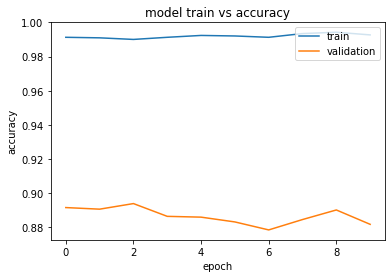

[[912 120]
 [115 993]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1032
           1       0.89      0.90      0.89      1108

    accuracy                           0.89      2140
   macro avg       0.89      0.89      0.89      2140
weighted avg       0.89      0.89      0.89      2140

Accuracy :  0.8901869158878505
Precison :  0.890216094523479
Recall :  0.8901869158878505
F1 :  0.8901966412147208


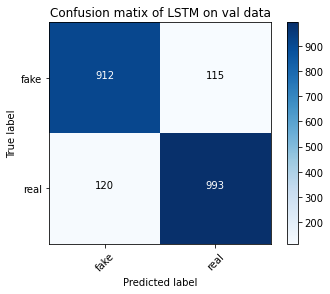

In [82]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model train vs accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0,1.05)
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
print_metrices(j,y_pred)
plot_confusion_matrix(confusion_matrix(j,y_pred),target_names=['fake','real'], normalize = False, title = 'Confusion matix of LSTM on val data')